In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [13]:
test = pd.read_csv("test.csv")
test = test.set_index('Date')

test_sentiment = test["Sentiment"]
test_daily = test["Daily Change"]

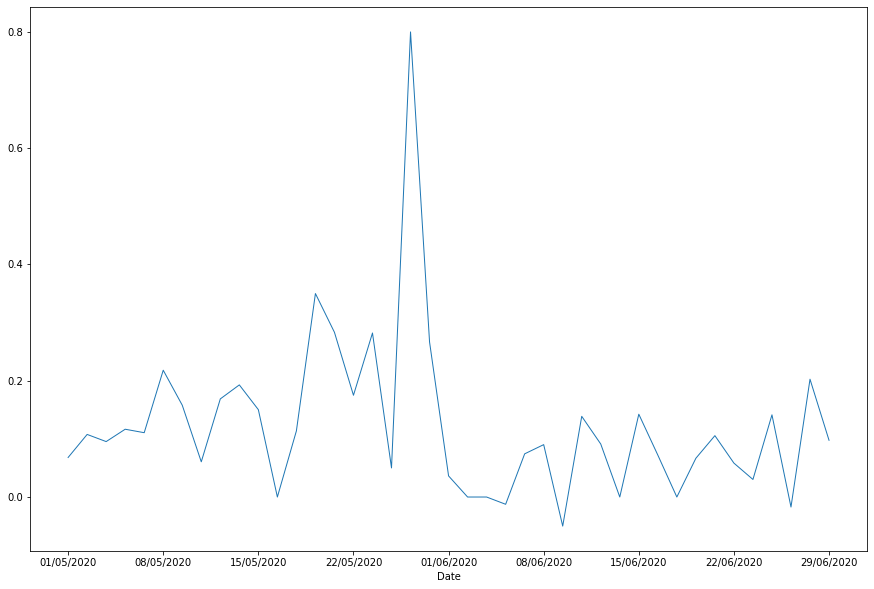

In [21]:
test_sentiment_plot = test_sentiment.plot(linewidth=1, figsize=(15,10))

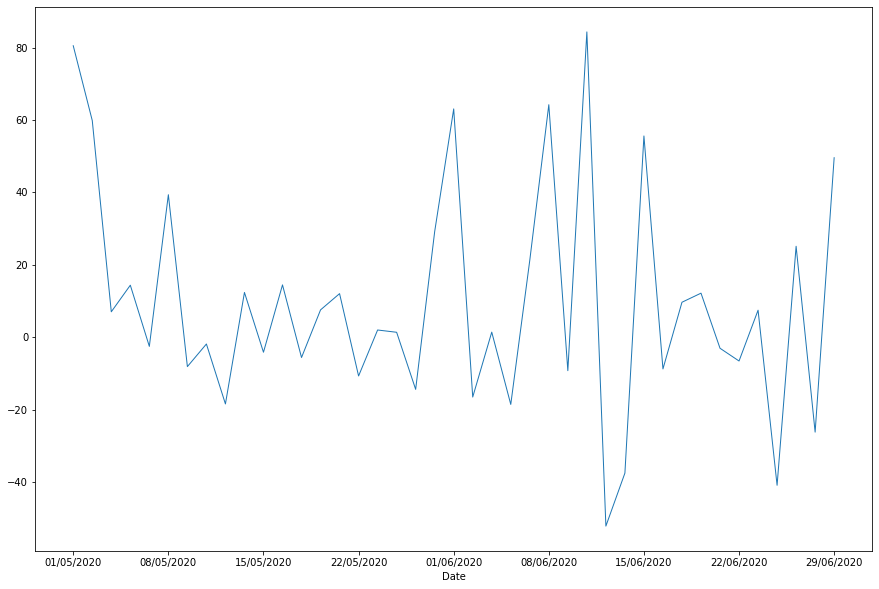

In [22]:
test_daily_plot = test_daily.plot(linewidth=1, figsize=(15,10))

In [24]:
train = pd.read_csv("train.csv")
train = train.set_index('Date')

train_sentiment = train["Sentiment"]
train_daily = train["Daily Change"]

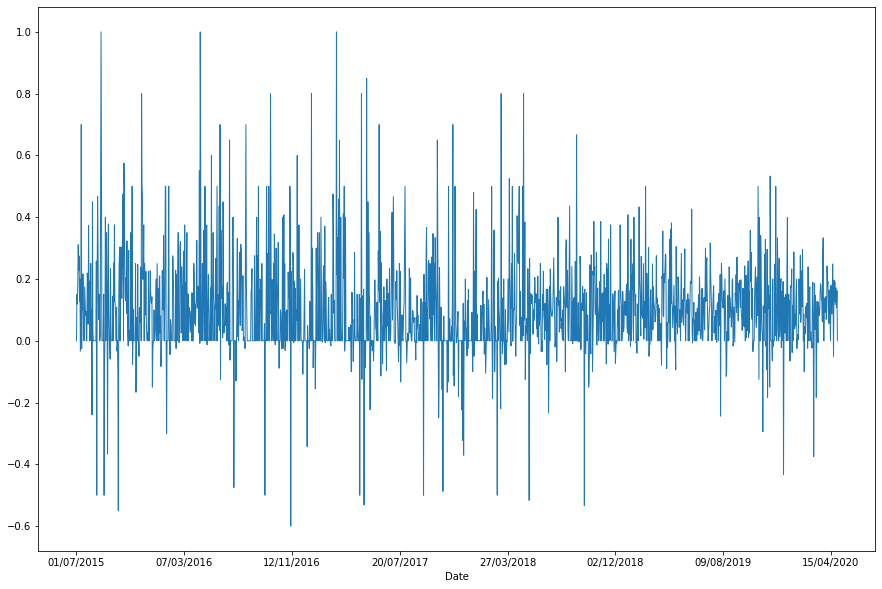

In [25]:
train_sentiment_plot = train_sentiment.plot(linewidth=1, figsize=(15,10))

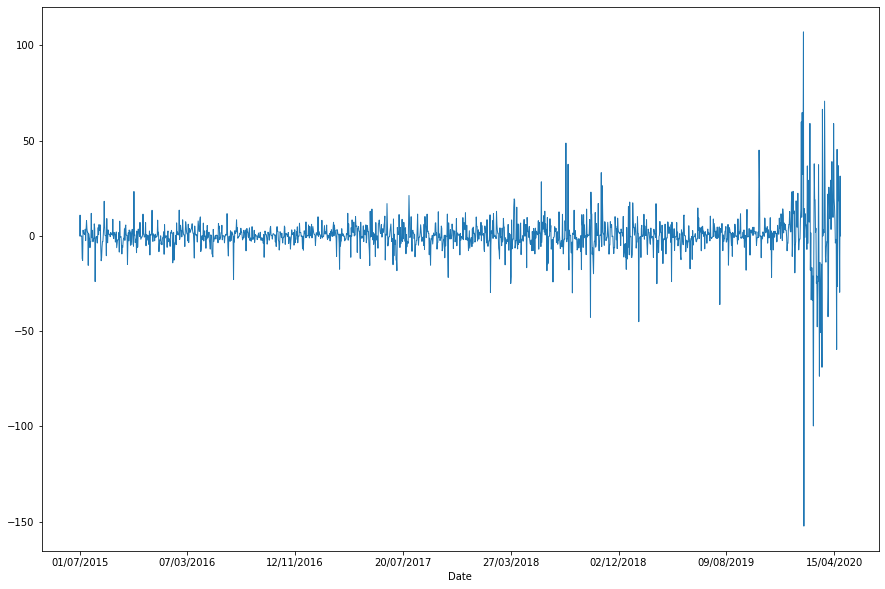

In [26]:
train_daily_plot = train_daily.plot(linewidth=1, figsize=(15,10))

In [37]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

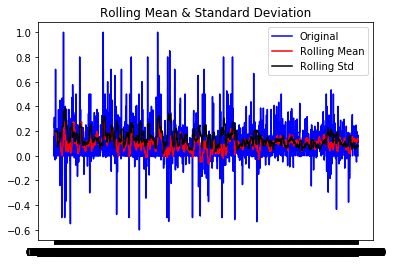

Results of Dickey-Fuller Test:
Test Statistic                -1.601447e+01
p-value                        6.302954e-29
#Lags Used                     5.000000e+00
Number of Observations Used    1.760000e+03
Critical Value (1%)           -3.434071e+00
Critical Value (5%)           -2.863184e+00
Critical Value (10%)          -2.567645e+00
dtype: float64


In [38]:
test_stationarity(train_sentiment)

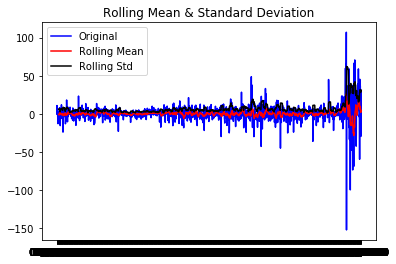

Results of Dickey-Fuller Test:
Test Statistic                -8.236013e+00
p-value                        5.887558e-13
#Lags Used                     2.500000e+01
Number of Observations Used    1.740000e+03
Critical Value (1%)           -3.434114e+00
Critical Value (5%)           -2.863202e+00
Critical Value (10%)          -2.567655e+00
dtype: float64


In [39]:
test_stationarity(train_daily)

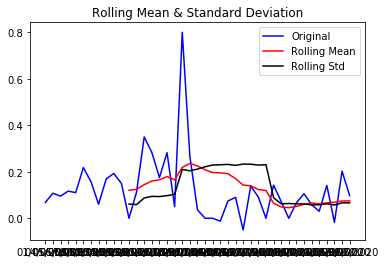

Results of Dickey-Fuller Test:
Test Statistic                 -5.213074
p-value                         0.000008
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [40]:
test_stationarity(test_sentiment)

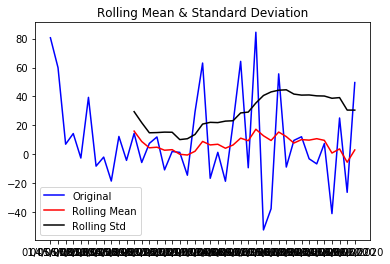

Results of Dickey-Fuller Test:
Test Statistic                -7.721369e+00
p-value                        1.190177e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64


In [41]:
test_stationarity(test_daily)